<a href="https://colab.research.google.com/github/victormuuo/Data-Science-Repo/blob/main/Linear_Regression_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stata
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Mount Google Drive With Google Colab



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path="/content/sample_data/california_housing_test.csv"

## **Loading California housing data**


In [ ]:
data=pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
# Check for missing values
missing_values=data.isnull().sum()
#calculate percentage of missing data in each column
missing_percentage=(missing_values/len(data))*100
#Display the missing data statistics
print("Missing Values in Each column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)



Missing Values in Each column:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Percentage of Missing Data:
 longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
dtype: float64


In [ ]:
#Remove rows with missing values (in our case none)
data_cleaned=data.dropna()
#verify that missing values have been removed
print("\nMissing Value in Each Column After Removal: ")
print(data_cleaned.isnull().sum())


Missing Value in Each Column After Removal: 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


## **Data Exploration and Visualization**

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


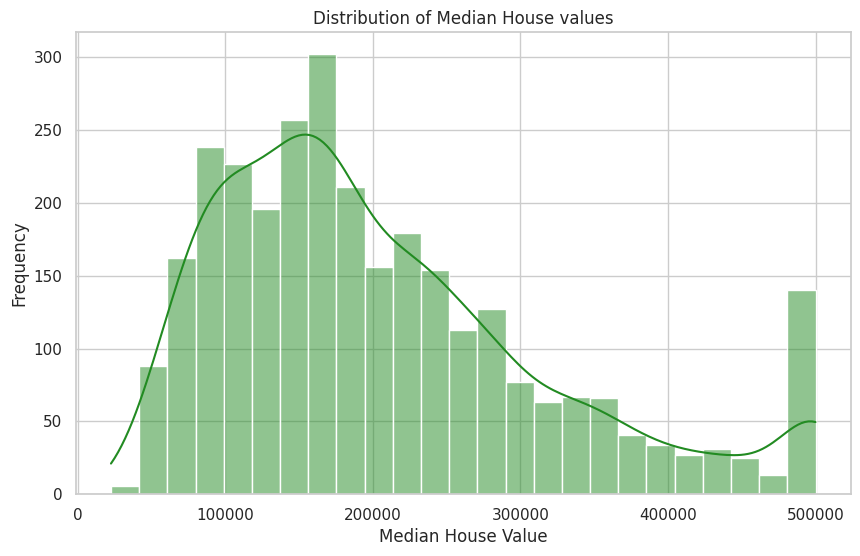

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['median_house_value'], color='forestgreen', kde=True)
plt.title("Distribution of Median House values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


## **Using Intequartile Range for Outlier Detection**

In [ ]:
Q1=data_cleaned['median_house_value'].quantile(0.25)
Q3=data_cleaned['median_house_value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
#Remove outliers
data_no_outliers_1=data_cleaned[(data_cleaned['median_house_value']>=lower_bound) & (data_cleaned['median_house_value']<=upper_bound) ]
#Check the shape of the data before and after removal of outliers
print("Original Data Shape:",data_cleaned.shape)
print("New Data Shape Without Outliers:", data_no_outliers_1.shape)

Original Data Shape: (3000, 9)
New Data Shape Without Outliers: (2859, 9)


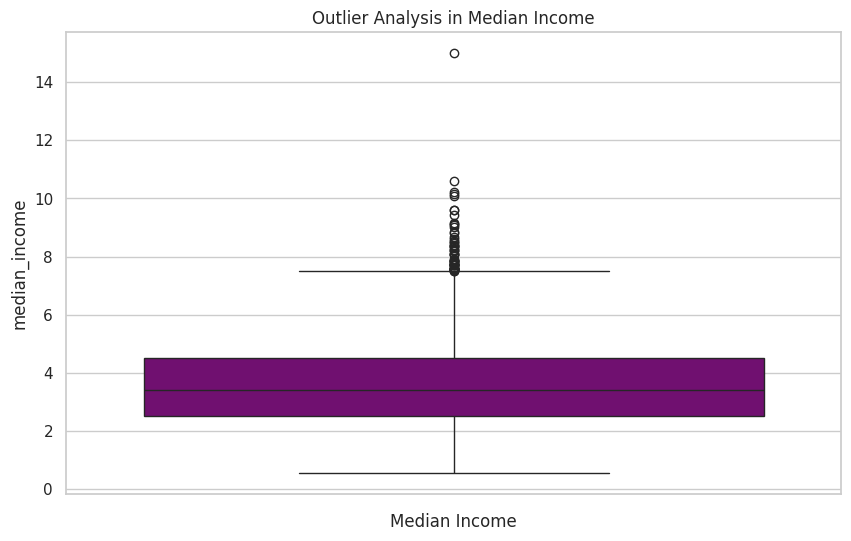

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data_no_outliers_1['median_income'], color='purple')
plt.title("Outlier Analysis in Median Income")
plt.xlabel("Median Income")
plt.show()

In [ ]:
Q1=data_no_outliers_1['median_income'].quantile(0.25)
Q3=data_no_outliers_1['median_income'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
#Remove outliers
data_no_outliers_2=data_no_outliers_1[(data_no_outliers_1['median_income']>=lower_bound) & (data_no_outliers_1['median_income']<=upper_bound) ]
#Check the shape of the data before and after removal of outliers
print("Original Data Shape:",data_no_outliers_1.shape)
print("New Data Shape Without Outliers:", data_no_outliers_2.shape)

Original Data Shape: (2859, 9)
New Data Shape Without Outliers: (2800, 9)


In [ ]:
data=data_no_outliers_2

## **Correlation Analysis - Heatmap**

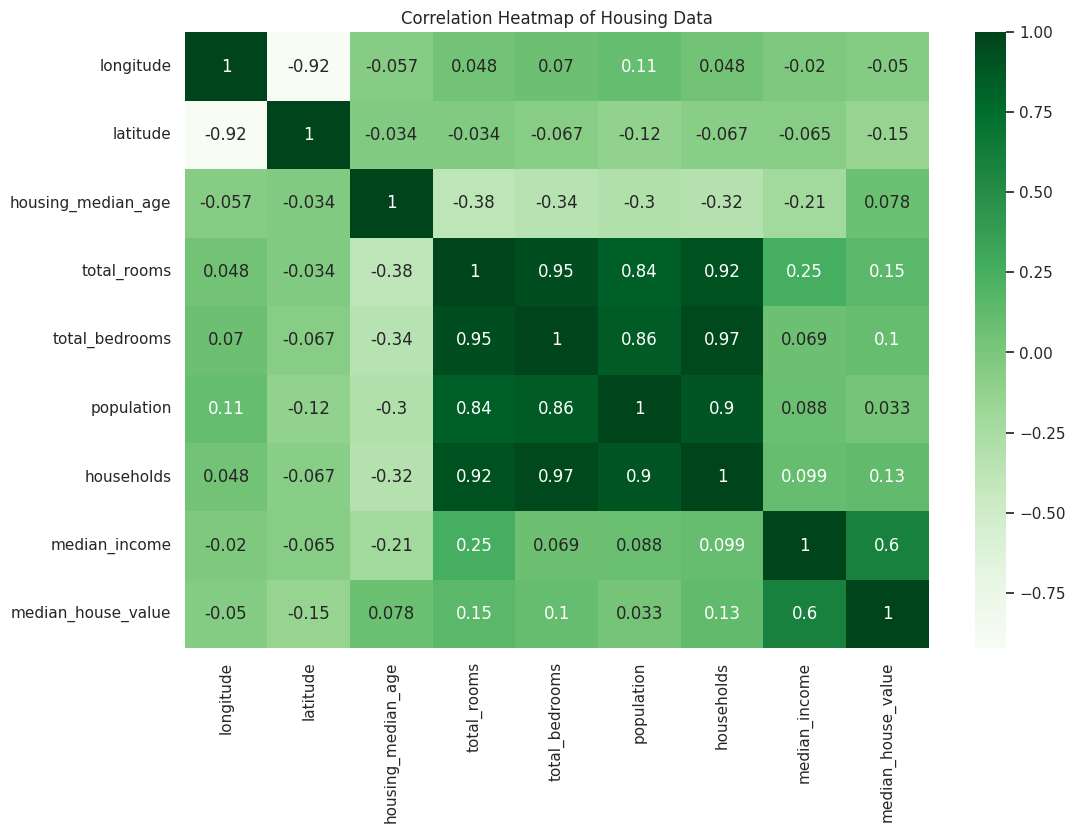

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.title("Correlation Heatmap of Housing Data")
plt.show()

In [ ]:

data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

### **Splitting Data into Train and Test**

In [ ]:
features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
target=["median_house_value"]
X=data[features]
y=data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)
# Checking the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')


Training set size: 2240 samples
Test set size: 560 samples


### **Training**

In [ ]:
# Adding a constant to the predictors because statsmodel by default doesn't include it
X_train_const=sm.add_constant(X_train)
model_fitted=sm.OLS(y_train,X_train_const).fit()
# Fit the OLS model
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     373.3
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        20:49:01   Log-Likelihood:                -27812.
No. Observations:                2240   AIC:                         5.564e+04
Df Residuals:                    2231   BIC:                         5.569e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.281e+06   1.65

### **Prediction/Testing**

In [ ]:
# Adding constant to test predictors
X_test_const=sm.add_constant(X_test)
# Making predictions on the test set
test_prediction=model_fitted.predict(X_test_const)
test_prediction

268     164108.836077
1756    218228.295066
2435    158052.417488
758     234883.188628
1016    249569.642673
            ...      
206     180676.791001
1472    254755.871209
2190    317005.741579
1950    224785.223231
2131    187707.358050
Length: 560, dtype: float64

## **Checking OLS Assumptions**

##

# **Assumption 1 : Linearity**

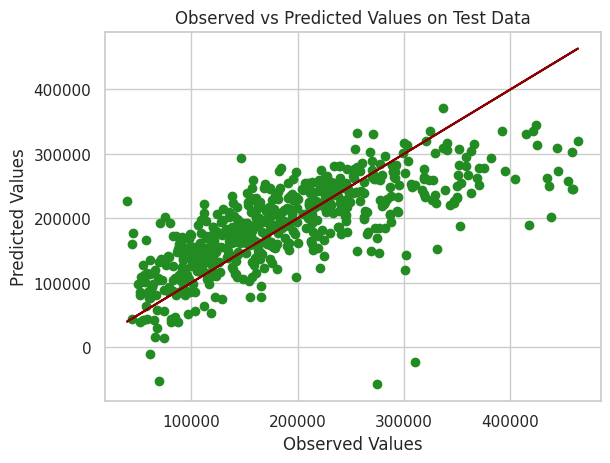

In [ ]:
# Scatter plot for observed values and predicted values on test data
plt.scatter(y_test,test_prediction,color="forestgreen")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed vs Predicted Values on Test Data")
plt.plot(y_test,y_test,color="darkred")   #line for perfect prediction (true values)
plt.show()



# **Assumption 2 : Random Sample**

The mean of the residuals is 0.0


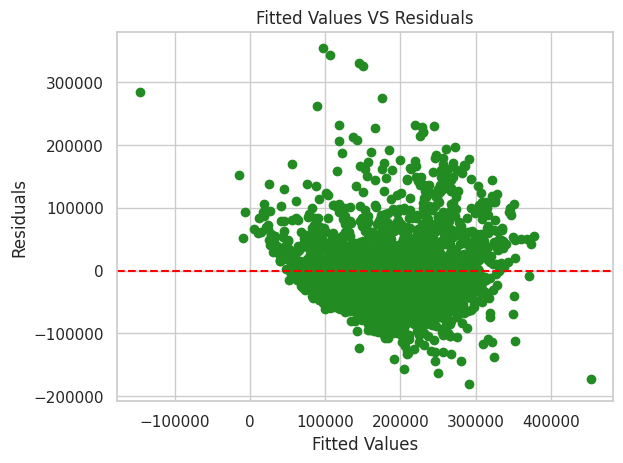

In [ ]:
# Calculate mean of the residuals
mean_residuals=np.mean(model_fitted.resid)
print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

# plotting the residuals
plt.scatter(model_fitted.fittedvalues,model_fitted.resid,color="forestgreen")
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values VS Residuals")
plt.show()

# Assumption 3: Exogeinity


In [ ]:
# Calculate the residuals
residuals=model_fitted.resid
#Check for correlation between the residuals and each predictor
for column in X_train.columns:
  corr_coefficient=np.corrcoef(X_train[column],residuals)[0,1]
  print(f"Correlation between residuals and {column}:{np.round(corr_coefficient,2)}")



Correlation between residuals and longitude:-0.0
Correlation between residuals and latitude:-0.0
Correlation between residuals and housing_median_age:-0.0
Correlation between residuals and total_rooms:0.0
Correlation between residuals and total_bedrooms:0.0
Correlation between residuals and population:0.0
Correlation between residuals and households:0.0
Correlation between residuals and median_income:0.0


#  Assumption 4: Homoskedasticity



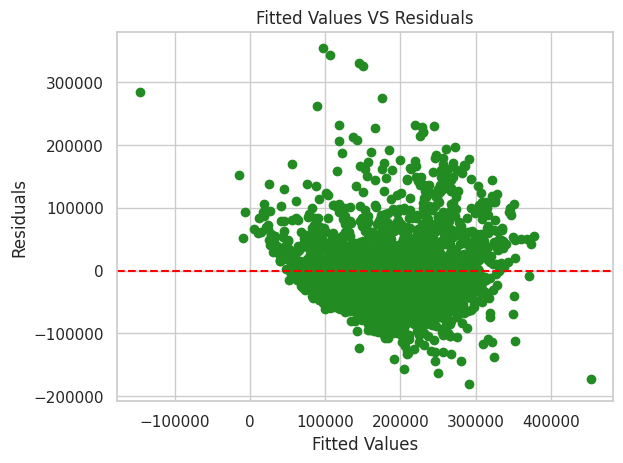

In [ ]:
# plotting the residuals
plt.scatter(model_fitted.fittedvalues,model_fitted.resid,color="forestgreen")
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values VS Residuals")
plt.show()

#  Train/Test/Evaluation with sklearn


In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialise Standard Scaler
scaler=StandardScaler()
# Fit the scaler on the training data and transform it
X_train_scaled=scaler.fit_transform(X_train)

#Apply transformation on test data
X_test_scaled=scaler.transform(X_test)

from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# create and fit the model
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

#make predictions on the scaled test data
y_pred=lr.predict(X_test_scaled)


#Calculate MSE and RMSE
mse=mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)

# Output the Perfomance Metrics
print(f"MSE on Test Set: {mse}")
print(f"RMSE on Test Set: {rmse}")



MSE on Test Set: 3891679269.8985
RMSE on Test Set: 62383.325255219446
